<a href="https://colab.research.google.com/github/DanialQureshi26/ML-Projects/blob/main/tensorflow_mnist_fashion_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the tensorflow fashion mnist dataset

import tensorflow as tf

mnist = tf.keras.datasets.fashion_mnist

(train_data, train_labels) ,  (test_data, test_labels) = mnist.load_data()



4422102/4422102 [==============================] - 0s 0us/step


In [2]:
# Normalize pixel values to be between 0 and 1
train_data = train_data / 255.0
test_data = test_data / 255.0

In [3]:
# Lets see an example data and its label from the dataset

print("Example data:", train_data[0])
print("Example label:", train_labels[0])


Example data: [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.0

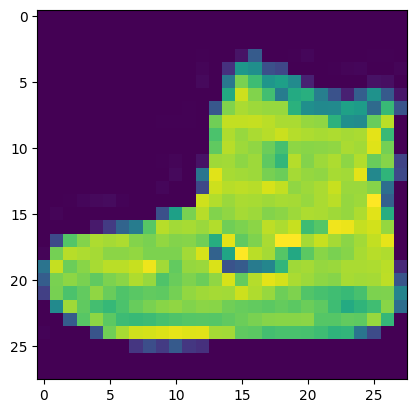

In [4]:
# lets plot that using the matplotlib

import matplotlib.pyplot as plt

plt.imshow(train_data[0])
plt.show()


In [5]:
# create list of all our traning labels so that it can be human understandable

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


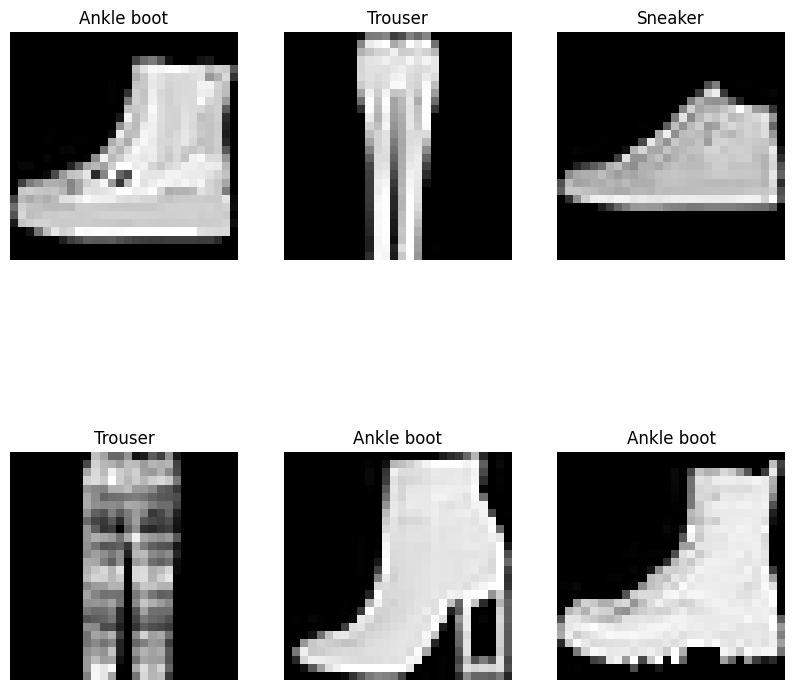

In [6]:
# Plot 6 random images from training horizontally

import random
import matplotlib.pyplot as plt

# Choose 6 random images from the training set
random_indices = random.sample(range(len(train_data)), 6)

# Initialize the figure
plt.figure(figsize=(10, 10))

# Loop over the 6 images and plot them
for i, index in enumerate(random_indices):
  plt.subplot(2, 3, i + 1)
  plt.imshow(train_data[index], cmap="gray")
  plt.title(class_names[train_labels[index]])
  plt.axis("off")

# Display the figure
plt.show()


In [7]:
# find the input shape of any image from training

print(train_data[0].shape)


(28, 28)


# Start Building Our Model

In [8]:
# Set random seed
tf.random.set_seed(42)

In [9]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), # Flatten the data into one long vector from 28 * 28 to 784
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])

In [10]:
# prompt: Compile the model

model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), # SparseCategoricalCrossentropy is used instead of simple one because our data is not OneHotEncoded it is in int form
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])


In [11]:
# prompt: Fit the model

model_1.fit(train_data, train_labels, epochs = 10)


Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4999 - accuracy: 0.8258
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3761 - accuracy: 0.8642
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3390 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3142 - accuracy: 0.8858
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2960 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2821 - accuracy: 0.8948
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2702 - accuracy: 0.8995
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2595 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2494 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.242

In [12]:
test_loss, test_acc = model_1.evaluate(test_data, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 1s - loss: 0.3460 - accuracy: 0.8799 - 694ms/epoch - 2ms/step

Test accuracy: 0.8798999786376953


# **Creating** a new model by adding some more layers to get better results

In [13]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_2.fit(train_data, train_labels, epochs=10)

test_loss_2, test_acc_2 = model_2.evaluate(test_data, test_labels, verbose=2)



Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4766 - accuracy: 0.8280
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3567 - accuracy: 0.8680
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3235 - accuracy: 0.8796
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2995 - accuracy: 0.8888
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2819 - accuracy: 0.8943
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2665 - accuracy: 0.8988
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2552 - accuracy: 0.9034
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2449 - accuracy: 0.9075
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2344 - accuracy: 0.9106
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.226

In [14]:
print('\nTest accuracy:', test_acc_2)


Test accuracy: 0.8919000029563904


# Trying to improve data using L2 regularization technique

In [15]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_3.fit(train_data, train_labels, epochs=10)

test_loss_3, test_acc_3 = model_3.evaluate(test_data, test_labels, verbose=2)



Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.9686 - accuracy: 0.7484
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7203 - accuracy: 0.8036
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6838 - accuracy: 0.8087
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6705 - accuracy: 0.8100
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6688 - accuracy: 0.8113
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6604 - accuracy: 0.8108
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6593 - accuracy: 0.8104
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6555 - accuracy: 0.8130
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6500 - accuracy: 0.8128
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.656

# Improving our model using Learning rate adjustment

In [16]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=optimizer,
                metrics=['accuracy'])

model_4.fit(train_data, train_labels, epochs=10)
test_loss_4, test_acc_4 = model_4.evaluate(test_data, test_labels, verbose=2)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.7013 - accuracy: 0.7755
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4736 - accuracy: 0.8393
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4311 - accuracy: 0.8524
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4048 - accuracy: 0.8594
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3875 - accuracy: 0.8651
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3729 - accuracy: 0.8698
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3610 - accuracy: 0.8734
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3501 - accuracy: 0.8777
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3421 - accuracy: 0.8784
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.334

# Model wise comparison

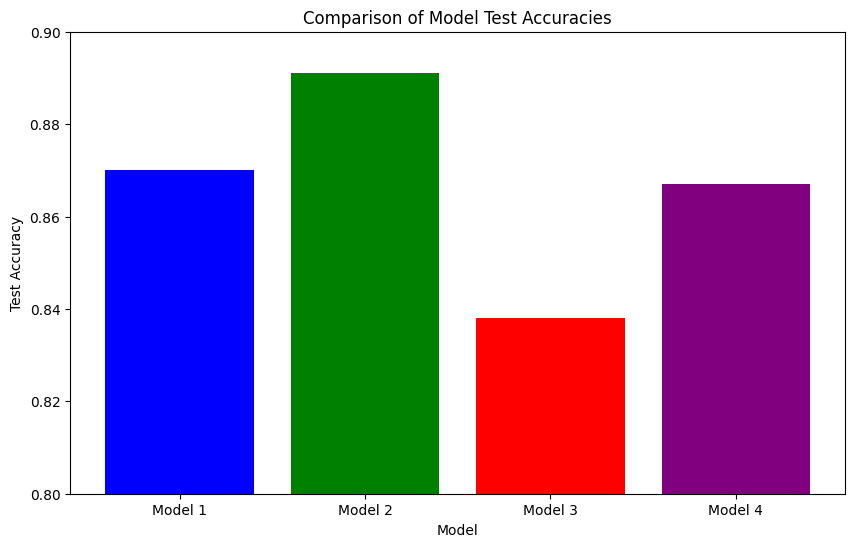

In [17]:
import matplotlib.pyplot as plt

# Test accuracies for each model
test_accuracies = [0.87, 0.891, 0.8381, 0.8671]
model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, test_accuracies, color=['blue', 'green', 'red', 'purple'])
plt.ylim(0.8, 0.9)
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Model Test Accuracies')
plt.show()


# Trying to improve the model by icreasing number of epoches of model_1 i will name this model model_5 using the code of model_1 but just increasing the number of epochs

In [18]:
# Set random seed
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), # Flatten the data into one long vector from 28 * 28 to 784
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])


# prompt: Compile the model

model_5.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), # SparseCategoricalCrossentropy is used instead of simple one because our data is not OneHotEncoded it is in int form
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

# prompt: Fit the model

model_5.fit(train_data, train_labels, epochs = 30)

test_loss_5, test_acc_5 = model_5.evaluate(test_data, test_labels, verbose=2)
print('\nTest accuracy:', test_acc_5)


Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4951 - accuracy: 0.8261
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3719 - accuracy: 0.8658
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3334 - accuracy: 0.8791
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3095 - accuracy: 0.8874
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2928 - accuracy: 0.8915
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2771 - accuracy: 0.8962
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2669 - accuracy: 0.9017
Epoch 8/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2549 - accuracy: 0.9045
Epoch 9/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2455 - accuracy: 0.9084
Epoch 10/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.238

In [19]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_2.fit(train_data, train_labels, epochs=30)

test_loss_2, test_acc_2 = model_2.evaluate(test_data, test_labels, verbose=2)
print('\nTest accuracy:', test_acc_2)

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6990 - accuracy: 0.7661
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4820 - accuracy: 0.8317
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4389 - accuracy: 0.8474
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4133 - accuracy: 0.8552
Epoch 5/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3942 - accuracy: 0.8616
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3771 - accuracy: 0.8663
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3638 - accuracy: 0.8713
Epoch 8/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3523 - accuracy: 0.8750
Epoch 9/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3409 - accuracy: 0.8793
Epoch 10/30
1875/1875 [==============================] - 7s 3ms/step - loss: 0.331

In [20]:
# prompt: Take the model 1 and train it with CNN

import tensorflow as tf

model_6 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model_6.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy']
)

model_6.fit(train_data, train_labels, epochs=10)

test_loss, test_acc = model_6.evaluate(test_data, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4071 - accuracy: 0.8552
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2750 - accuracy: 0.9006
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2292 - accuracy: 0.9160
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1953 - accuracy: 0.9279
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1690 - accuracy: 0.9373
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1461 - accuracy: 0.9455
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1263 - accuracy: 0.9527
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1072 - accuracy: 0.9612
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0932 - accuracy: 0.9660
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.079